In [1]:
import sys
import os
import importlib
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu
from statsmodels.stats.multitest import multipletests
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

project_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(os.path.join(project_dir, 'src', 'utilities'))
import utilities as utils

dataset_config_path = os.path.join(
    project_dir, 'configs', 'datasets_config.json')
with open (dataset_config_path) as json_config:
    dataset_config_options = json.load(json_config)

In [3]:
# Import if using in a the notebook within a browser
# from IPython.core.display import HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
# Run if changes are made to the datasets_config file or utilities
importlib.reload(utils)
with open (dataset_config_path) as json_config:
    dataset_config_options = json.load(json_config)

<module 'utilities' from 'c:\\Users\\Jonah\\Development\\churn-stats-ml-visualization\\src\\utilities\\utilities.py'>

In [2]:
dataset_key = 'telco-customer-churn'
dataset_config = dataset_config_options[dataset_key]
io_dir = os.path.join(project_dir, 'data', dataset_key)
processed_data_path = os.path.join(io_dir, 'processed', 'df.csv')

In [6]:
df = pd.read_csv(processed_data_path, index_col=0)

In [7]:
df.head()
df.describe()
df.info()
# Check for missing values
df.isna().sum()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,TenureQuartile,MonthlyChargesQuartile,TotalChargesQuartile
CustomerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,Month-to-month,Yes,Electronic check,29.85,29.85,No,Yes,0,0,0
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,One year,No,Mailed check,56.95,1889.50,No,Yes,2,1,2
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Yes,0,1,0
7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,One year,No,Bank transfer (automatic),42.30,1840.75,No,Yes,2,1,2
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Yes,0,2,0


,Tenure,MonthlyCharges,TotalCharges,TenureQuartile,MonthlyChargesQuartile,TotalChargesQuartile
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,1.479199,1.498509,1.499787
std,24.559481,30.090047,2266.794470,1.128980,1.117922,1.118304
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1394.550000,1.000000,1.000000,1.000000
75%,55.000000,89.850000,3786.600000,2.000000,2.000000,2.500000
max,72.000000,118.750000,8684.800000,3.000000,3.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  7043 non-null   object 
 1   SeniorCitizen           7043 non-null   object 
 2   Partner                 7043 non-null   object 
 3   Dependents              7043 non-null   object 
 4   Tenure                  7043 non-null   int64  
 5   PhoneService            7043 non-null   object 
 6   MultipleLines           7043 non-null   object 
 7   InternetServiceType     7043 non-null   object 
 8   OnlineSecurity          7043 non-null   object 
 9   OnlineBackup            7043 non-null   object 
 10  DeviceProtection        7043 non-null   object 
 11  TechSupport             7043 non-null   object 
 12  StreamingTV             7043 non-null   object 
 13  StreamingMovies         7043 non-null   object 
 14  Contract                7043 n

Gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
Tenure                    0
PhoneService              0
MultipleLines             0
InternetServiceType       0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              0
Churn                     0
InternetService           0
TenureQuartile            0
MonthlyChargesQuartile    0
TotalChargesQuartile      0
dtype: int64

### Data exploration
- Let's examine if any features clearly seperate churned vs retained customers
- Use a Chi^2 test of independence
- Use Cramer's V as to measure effect size
- Correct for multiple hypothesis testing

In [8]:
# target_variable will be used in several cells below
target_variable = 'Churn'
categorical_variables = []
for col in df.columns:
    if pd.api.types.is_string_dtype(df[col]) and col != target_variable:
        categorical_variables.append(col)
numerical_variables = []
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) and col != target_variable:
        numerical_variables.append(col)
categorical_variables
numerical_variables

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetServiceType',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'InternetService']

['Tenure',
 'MonthlyCharges',
 'TotalCharges',
 'TenureQuartile',
 'MonthlyChargesQuartile',
 'TotalChargesQuartile']

In [9]:
alpha = 0.05
pvalues = []
all_results = []
significant_results = []
chi2_result_result_keys = ('statistic', 'pvalue', 'chi2_dof', 'expected_freq')
for cat_var in categorical_variables:
    cat_var_result = {'feature': cat_var}
    df_crosstab = pd.crosstab(df[cat_var], df[target_variable])
    chi2_result = chi2_contingency(df_crosstab.to_numpy())
    for i, key in enumerate(chi2_result_result_keys):
        cat_var_result[key] = chi2_result[i]
    # Use Cramer's V to measure effect size
    effect_size = utils.calculate_cramers_v(
        df_crosstab, cat_var_result['statistic'])
    cat_var_result['effect_size'], cat_var_result['interpretation'] = effect_size
    pvalues.append(cat_var_result['pvalue'])
    all_results.append(cat_var_result)
multiple_test_correction = multipletests(
    pvalues, alpha=alpha, method='bonferroni')
corrected_alpha = multiple_test_correction[3]
for results in all_results:
    if results['pvalue'] <= corrected_alpha:
        significant_results.append(results)
# Order by highest to lowest effect size
significant_results = sorted(significant_results, key=lambda x: x['effect_size'], reverse=True)

### Let's compare the feature with the greatest effect size vs the feature with the smallest effect size
- Effect size interpretation: The higher the effect size, the better that feature seperated churned from retained customers

In [10]:
# greatest effect size
ges = significant_results[0]
ges['feature']
f'Effect size: {ges['interpretation']}'
ges_actual_freq = pd.crosstab(df[ges['feature']], df[target_variable])
ges_expected_freq = pd.DataFrame(ges['expected_freq'],
                                 columns=ges_actual_freq.columns,
                                 index=ges_actual_freq.index).map(np.ceil).astype(np.int64)
'Actual frequenceis'
ges_actual_freq
'Expected frequenceis'
ges_expected_freq

# smallest effect size
ses = significant_results[-1]
ses['feature']
f'Effect size: {ses['interpretation']}'
ses_actual_freq = pd.crosstab(df[ses['feature']], df[target_variable])
ses_expected_freq = pd.DataFrame(ses['expected_freq'],
                                 columns=ses_actual_freq.columns,
                                 index=ses_actual_freq.index).map(np.ceil).astype(np.int64)
'Actual frequenceis'
ses_actual_freq
'Expected frequenceis'
ses_expected_freq

'Contract'

'Effect size: Medium'

'Actual frequenceis'

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


'Expected frequenceis'

Churn,No,Yes
Contract,,
Month-to-month,2847,1029
One year,1083,391
Two year,1246,450


'Partner'

'Effect size: Small'

'Actual frequenceis'

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


'Expected frequenceis'

Churn,No,Yes
Partner,,
No,2675,967
Yes,2500,903


- It's not a perfect comparison since 'Contract' has 3 possible values and 'Partner' has 2
- However, we can still see that the actual and expected frequencies for 'Contract' differ more than the actual and expected frequencies for 'Partner'

In [11]:
sns.set_context('notebook', font_scale=0.5)

### Let's visualize the results
- Only plot the statistically significant results
- Descending order by effect size (left to right, top to bottom)

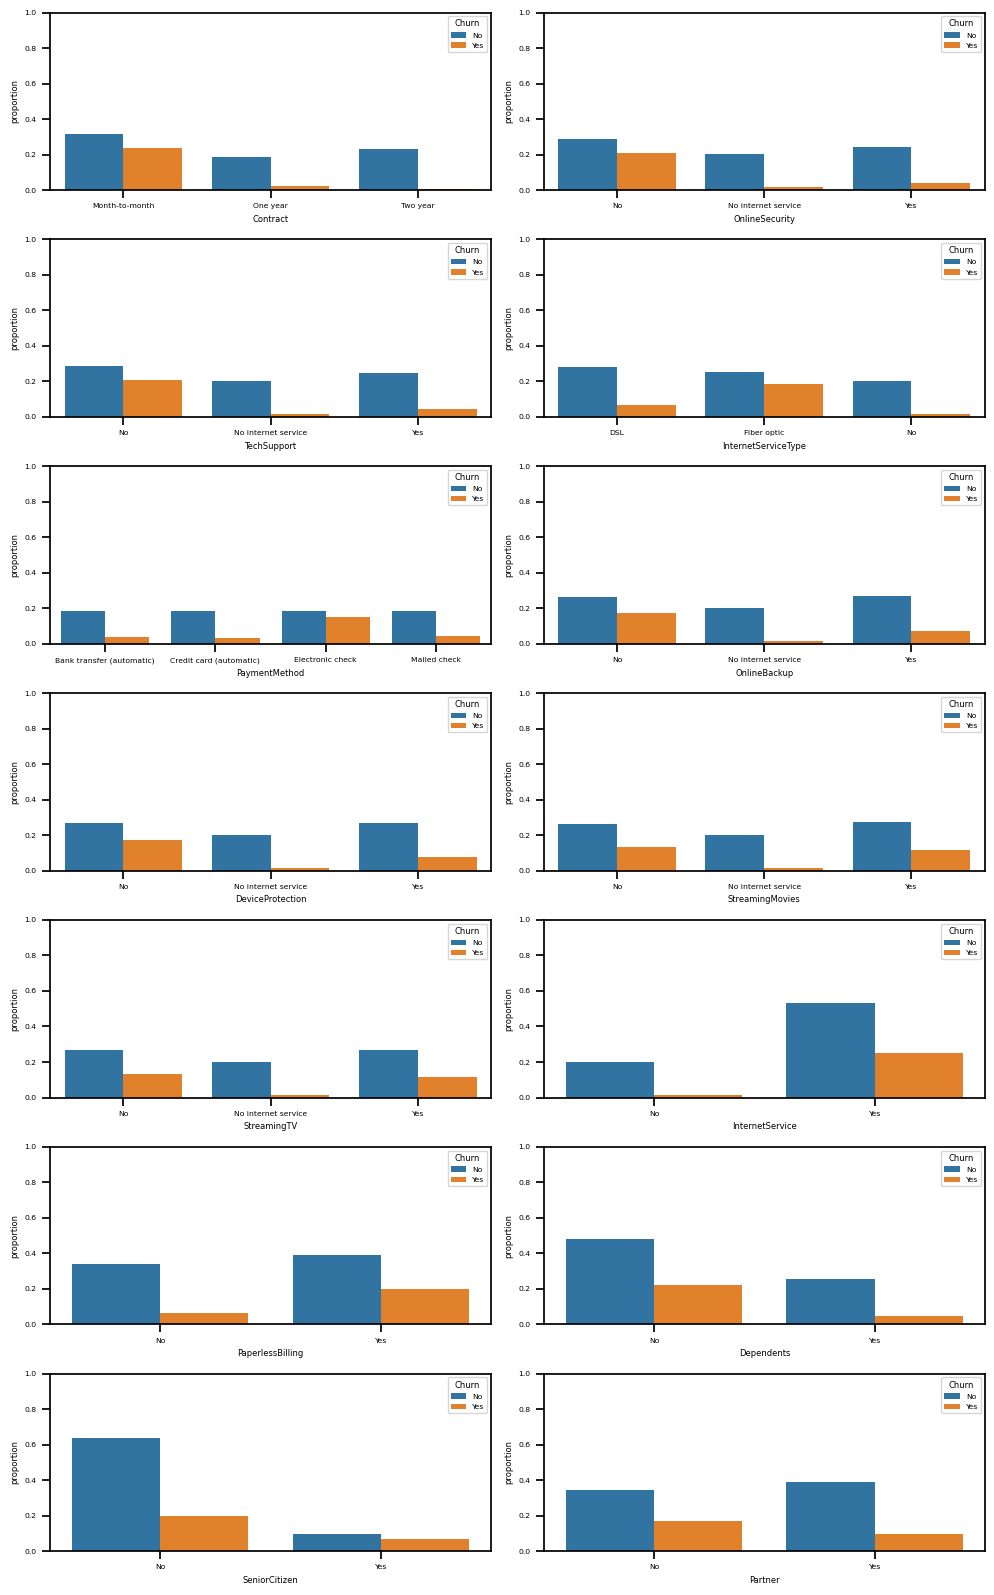

In [12]:
nrows = math.ceil(len(significant_results) / 2)
fig, axs = plt.subplots(nrows=nrows, ncols=2)
fig.set_figwidth(10)
fig.set_figheight(16)
ylim = (0, 1)
ax_row = 0
ax_col = 0
hue_order = sorted(df[target_variable].unique())
for i, feature_stats in enumerate(significant_results):
    feature = feature_stats['feature']
    effect_size_interpretation = feature_stats['interpretation']
    order = sorted(df[feature].unique())
    # 2 axs per row
    ax = axs[ax_row][ax_col]
    # # Ignore returned value to supress text output
    _ = ax.set(ylim=ylim)
    _ = sns.countplot(data=df, x=feature, order=order, hue=target_variable, hue_order=hue_order, stat='proportion', ax=ax)
    if i % 2 == 1:
        ax_row += 1
        ax_col = 0
    else:
        ax_col = 1
fig.tight_layout(pad=1.5)

### Let's examine a couple of features in more detail and form some hypotheses
- We will use the Mann-Whitney U test when examining the difference between 2 groups when the dependent variable is continuous 
    - The Mann-Whitney U test is the non-parametric counterpart to the t-test
- The asterisk annotations added to the plots correspond to the pvalue
    - See convert_pvalue_to_asterisks() in utilities.py
    - More asterisks correspond to lower pvalues
    - ns means not significant

#### Contract
'Contract' had the highest effect size out of the features, but an important question is whether or not this is causal, i.e., does having a contract prevent a customer from 'churning' or is it just that customers who like the service end up signing up for yearly contracts? 

Let's visualize 'Contract' in more detail, step-by-step

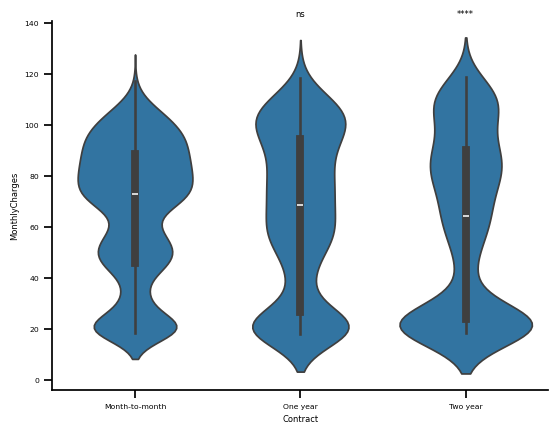

In [13]:
mwu_test_results = []
feature_1 = 'Contract'
feature_2 = 'MonthlyCharges'
# Compare 'Month-to-month' to other values
pairs_to_test = [('Month-to-month', 'One year'), ('Month-to-month', 'Two year')]
for pair in pairs_to_test:
    x = df.loc[df[feature_1] == pair[0]][feature_2]
    y = df.loc[df[feature_1] == pair[1]][feature_2]
    mwu_test_results.append(
        utils.convert_pvalue_to_asterisks(mannwhitneyu(x=x, y=y)[1]))
    
# Explicitly setting the order so we know the pvalue asterisks line up
# with the corresponding value along the x-axis
order = ['Month-to-month', 'One year', 'Two year']
y_text_location = 1.2 * df['MonthlyCharges'].max()
ax = sns.violinplot(data=df, x=feature_1, order=order, y=feature_2)
sns.despine()
for i, pval in enumerate(mwu_test_results):
    # Notice: offsetting i by +1
    _ = ax.text(x=i+1, y=y_text_location, s=pval, horizontalalignment='center')

Although the difference in monthly cost is only significant when comparing 'Month-to-month' with 'Two year', it is interesting that the median montlhy cost is greater for 'Month-to-month' customers.

Let's dissect this further and see if there is difference when we consider if the customer churned as well.

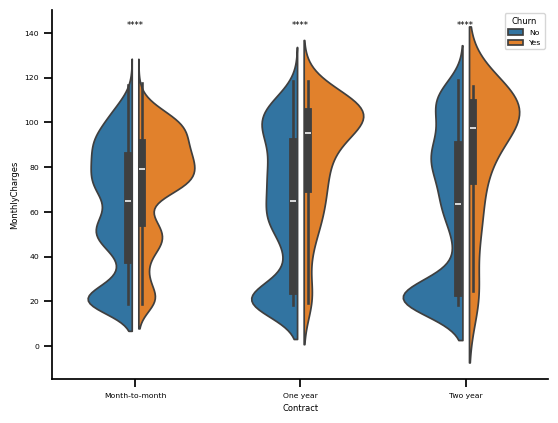

In [14]:
mwu_test_results = []
hue = 'Churn'
hue_order = ['No', 'Yes']
# Compare 'No' churn to 'Yes' churn for each contract type
pairs_to_test = [('No', 'Yes')]
for category in order:
    for pair in pairs_to_test:
        x = df.loc[(df[feature_1] == category) & (df[hue] == pair[0])][feature_2]
        y = df.loc[(df[feature_1] == category) & (df[hue] == pair[1])][feature_2]
        mwu_test_results.append(
            utils.convert_pvalue_to_asterisks(mannwhitneyu(x=x, y=y)[1]))

ax = sns.violinplot(
    data=df, x=feature_1, order=order, y=feature_2, hue=hue, hue_order=hue_order,
    split=True, gap=0.1)
sns.despine()
for i, pval in enumerate(mwu_test_results):
    # Notice: Not offsetting i
    _ = ax.text(x=i, y=y_text_location, s=pval, horizontalalignment='center')

Regardless of contract type, customers who pay more on a monthly basis tend to leave the service more than those with lower monthly costs. 

One problem with this violin plot is that it doesn't take the proportion of observations in each category into account. Let's normalize the violin's width relative to the proportion of observations. 

In [15]:
df[['Contract', 'Churn']].value_counts()

Contract        Churn
Month-to-month  No       2220
                Yes      1655
Two year        No       1647
One year        No       1307
                Yes       166
Two year        Yes        48
Name: count, dtype: int64

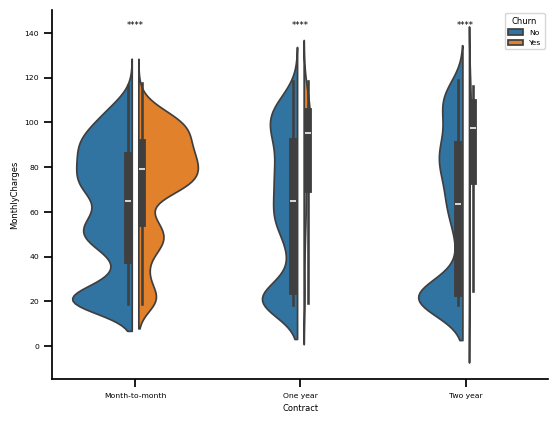

In [16]:
mwu_test_results = []
hue = 'Churn'
hue_order = ['No', 'Yes']
# Compare 'No' churn to 'Yes' churn for each contract type
pairs_to_test = [('No', 'Yes')]
for category in order:
    for pair in pairs_to_test:
        x = df.loc[(df[feature_1] == category) & (df[hue] == pair[0])][feature_2]
        y = df.loc[(df[feature_1] == category) & (df[hue] == pair[1])][feature_2]
        mwu_test_results.append(
            utils.convert_pvalue_to_asterisks(mannwhitneyu(x=x, y=y)[1]))

ax = sns.violinplot(
    data=df, x=feature_1, order=order, y=feature_2, hue=hue, hue_order=hue_order,
    split=True, gap=0.1, density_norm='count')
sns.despine()
for i, pval in enumerate(mwu_test_results):
    # Notice: Not offsetting i
    _ = ax.text(x=i, y=y_text_location, s=pval, horizontalalignment='center')


#### Contract - observations, hypotheses, and questions
- Observations: 
    - Proportionally, customers with month-to-month contracts drop the service (churn) more than customers with yearly contracts
    - Cusotmers with yearly contracts tend to pay less on a monthly basis
    - Customers who pay less on a monthly basis tend keep the service
- Hypotheses to investigate:
    - Locking customers into yearly contracts prevents churning
    - Yearly contracts lower monthly costs which leads to customer retention
    - Customers who like the service and/or enjoy specific features eventually sign up for yearly contracts
- Questions:
    - Are there specific services and/or features that are common among customers who sign up for yearly contracts?
    - Will advertising plans that offer less features but are also less expensive convince customers who are considering dropping the service switch to a cheaper plan instead? 

#### Let's explore any connections between service, features, cost, and churn

In [17]:
df['PhoneAndInternetService'] = df.apply(lambda x: 'Both' if x['PhoneService'] != 'No' and x['InternetService'] != 'No'
                                         else 'Phone' if x['PhoneService'] != 'No'
                                         else 'Internet' if x['InternetService'] != 'No'
                                         else 'Neither', axis=1)
df['PhoneAndInternetService'].value_counts()

PhoneAndInternetService
Both        4835
Phone       1526
Internet     682
Name: count, dtype: int64

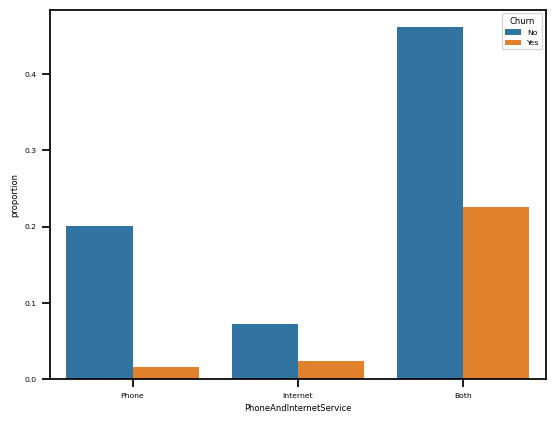

In [18]:
feature = 'PhoneAndInternetService'
order = ['Phone', 'Internet', 'Both']
hue = 'Churn'
hue_order = ['No', 'Yes']
# # Ignore returned value to supress text output
_ = sns.countplot(data=df, x=feature, order=order, hue=target_variable, hue_order=hue_order, stat='proportion')

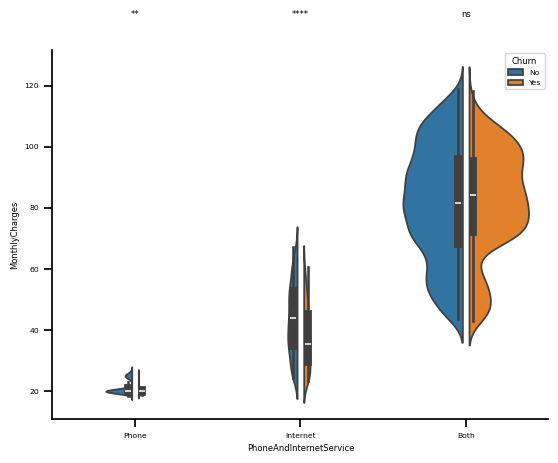

In [19]:
mwu_test_results = []
feature_1 = 'PhoneAndInternetService'
feature_2 = 'MonthlyCharges'
order = ['Phone', 'Internet', 'Both']
y_text_location = 1.2 * df['MonthlyCharges'].max()
hue = 'Churn'
hue_order = ['No', 'Yes']
pairs_to_test = [('No', 'Yes')]
for category in order:
    for pair in pairs_to_test:
        x = df.loc[(df[feature_1] == category) & (df[hue] == pair[0])][feature_2]
        y = df.loc[(df[feature_1] == category) & (df[hue] == pair[1])][feature_2]
        mwu_test_results.append(
            utils.convert_pvalue_to_asterisks(mannwhitneyu(x=x, y=y)[1]))

ax = sns.violinplot(
    data=df, x=feature_1, order=order, y=feature_2, hue=hue, hue_order=hue_order,
    split=True, gap=0.1, density_norm='count')
sns.despine()
for i, pval in enumerate(mwu_test_results):
    # Notice: Not offsetting i
    _ = ax.text(x=i, y=y_text_location, s=pval, horizontalalignment='center')